<a href="https://colab.research.google.com/github/sahupra1357/FeatureEngineering/blob/main/ExploratoryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [19]:
import pandas as pd
import matplotlib
mall_customer_info = pd.read_csv('Mall_Customers.csv')
mall_customer_info.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


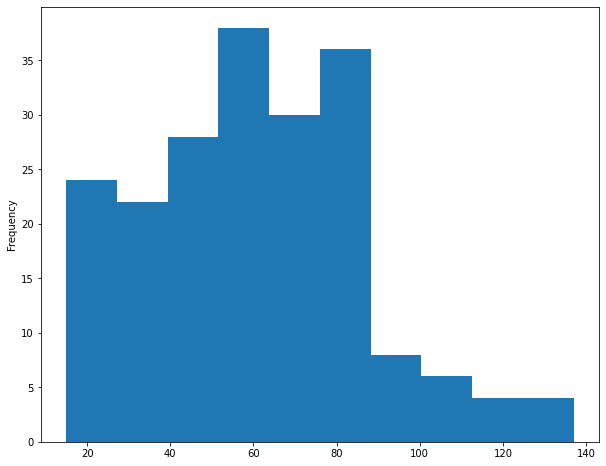

In [20]:
mall_customer_info['Annual Income (k$)'].plot.hist(bins=10, figsize=(10,8));

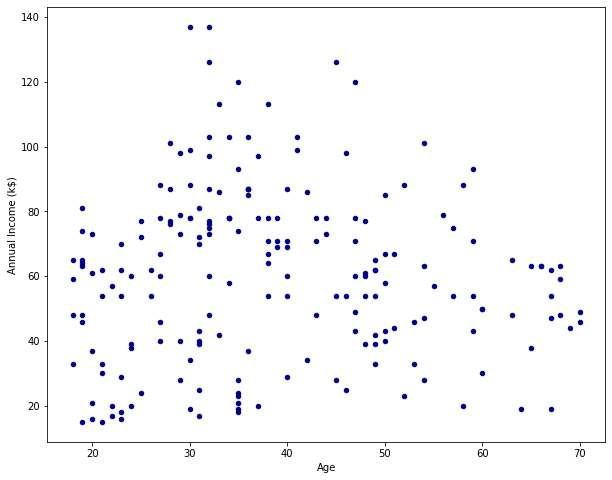

In [21]:
mall_customer_info.plot.scatter(x='Age', y='Annual Income (k$)', c='Darkblue', figsize=(10,8));

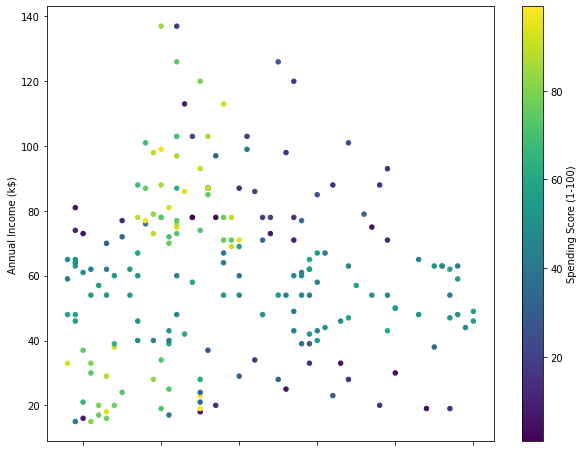

In [22]:
mall_customer_info.plot.scatter(x='Age', y='Annual Income (k$)', c='Spending Score (1-100)', colormap='viridis', figsize=(10,8));

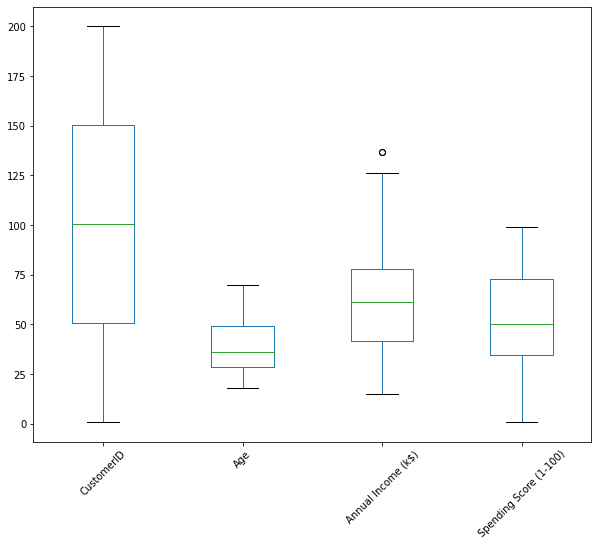

In [23]:
boxplot = mall_customer_info.boxplot(grid=False, rot=45,figsize=(10,8))

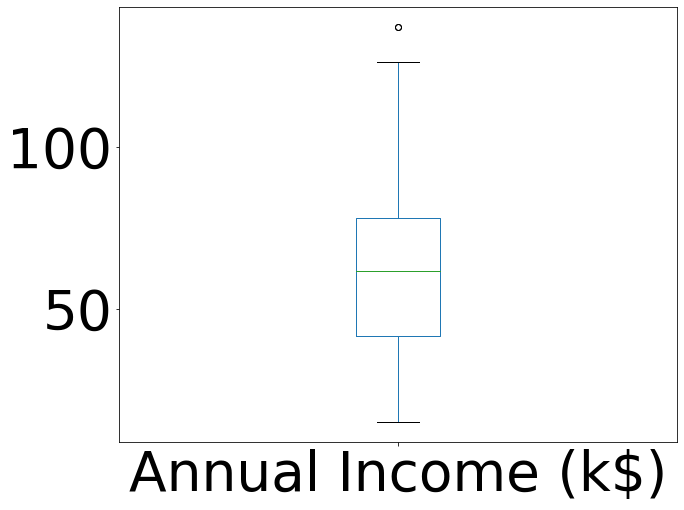

In [24]:
boxplot = mall_customer_info.boxplot(grid=False, fontsize=55,column=['Annual Income (k$)'], figsize=(10,8))

In [25]:
mall_customer_info.loc[mall_customer_info['Annual Income (k$)'] > 125]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [26]:
Q1 = mall_customer_info['Annual Income (k$)'].quantile(0.25)
Q3 = mall_customer_info['Annual Income (k$)'].quantile(0.75)
print(Q1, Q3)

41.5 78.0


In [27]:
IQR = Q3 - Q1

In [28]:
mall_customer_info['Annual_Income_Outlier']=False

In [29]:
mall_customer_info.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Annual_Income_Outlier
0,1,Male,19,15,39,False
1,2,Male,21,15,81,False
2,3,Female,20,16,6,False
3,4,Female,23,16,77,False
4,5,Female,31,17,40,False


In [30]:
Q1 + 1.5 * IQR

96.25

In [31]:
for index, row in mall_customer_info.iterrows():
  if row['Annual Income (k$)'] >  (Q1 + 1.5 * IQR):
    mall_customer_info.at[index, 'Annual_Income_Outlier'] = True

In [36]:
mall_customer_info['Annual_Income_Outlier'].sum()

20

In [40]:
non_outliers = mall_customer_info.loc[mall_customer_info['Annual_Income_Outlier'] == False]
non_outliers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Annual_Income_Outlier
0,1,Male,19,15,39,False
1,2,Male,21,15,81,False
2,3,Female,20,16,6,False
3,4,Female,23,16,77,False
4,5,Female,31,17,40,False


In [41]:
mean = non_outliers['Annual Income (k$)'].mean()
mean

55.1

In [42]:
for index, row in mall_customer_info.iterrows():
  if row['Annual_Income_Outlier'] ==True:
    mall_customer_info.at[index, 'Annual Income (k$)'] = mean

In [43]:
mall_customer_info.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Annual_Income_Outlier
47,48,Female,27,40,47,False
176,177,Male,58,88,15,False
177,178,Male,27,88,69,False
11,12,Female,35,19,99,False
88,89,Female,34,58,60,False


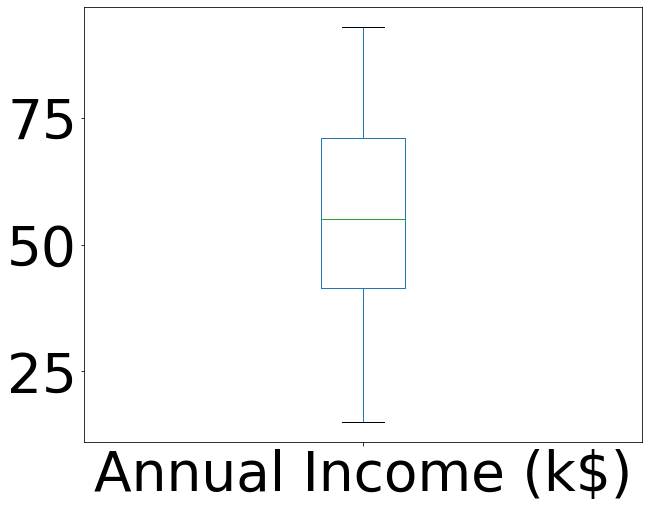

In [44]:
boxplot = mall_customer_info.boxplot(grid=False, fontsize=55,column=['Annual Income (k$)'], figsize=(10,8))